In [74]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import os
import pandas as pd

['f1', 'auc', 'loss']


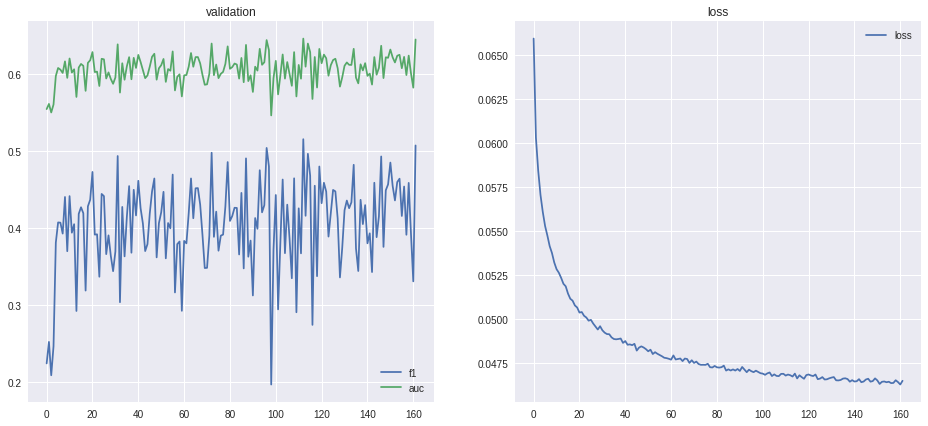

In [176]:
data_d = {}
dir_name = './models/cnn_solo1///'
for file in [x for x in os.listdir(dir_name) if x.find("history") != -1]:
    title = file[8:file.rfind(".txt")]
    with open(dir_name+file) as inp:
        data_d[title] = [float(y) for y in inp.readlines()]
print(data_d.keys())

f, ax = plt.subplots(1,2, figsize=(16, 7))
sns.set_style("darkgrid")
ax[0].set_title("validation")
ax[0].plot(data_d["f1"], label="f1")
ax[0].plot(data_d["auc"], label="auc")
ax[0].legend()
ax[1].set_title("loss")
ax[1].plot(data_d["loss"], label="loss")
ax[1].legend()
f.savefig("output.pdf")
plt.show()

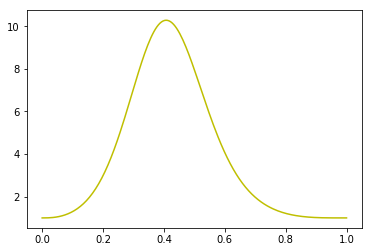

In [12]:
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt

x = np.linspace(0, 1, 200) 
y1 = np.exp(stats.beta.pdf(x, a=3.75, b=5))
plt.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 

plt.show()

In [286]:
stats.gamma.median(a=5, scale=.1)

0.46709088827959849

In [16]:
stats.gamma.median(a=5, scale=.1)

0.46709088827959849

In [17]:
a = 3.75
b = 5
print(stats.beta.pdf(1 - np.log(500) / np.log(50000), a=a, b=b))
print(stats.beta.pdf(1 - np.log(500) / np.log(50000) - .00001, a=a, b=b))
print(stats.beta.pdf(1 - np.log(500) / np.log(50000) + .00001, a=a, b=b))

2.31949603563
2.31950769979
2.3194843652


In [18]:
stats.beta.pdf([1,2,3], a=a, b=b)

array([ 0.,  0.,  0.])

In [10]:
from scipy.optimize import minimize

def func(x):
    return abs(stats.beta.mean(a=x[0], b=x[1]) - (1 - np.log(500) / np.log(50000)))

tmp = minimize(func, np.array([5, 3]))
print(tmp)
stats.beta.median(a=tmp.x[0], b=tmp.x[1])

      fun: 1.5039941514416455e-10
 hess_inv: array([[ 0.09621369,  0.45332686],
       [ 0.45332686,  2.13592698]])
      jac: array([ 0.06514511,  0.02808778])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 400
      nit: 3
     njev: 97
   status: 2
  success: False
        x: array([ 3.75267465,  5.06417815])


0.41976123498056556